# Kwadratury

## Zadanie 1
Zaimplementuj wielomiany Legendre'a.

 Skorzystam z zależności rekurencyjnej wielomianów Legendre'a: ${\displaystyle P_{n+1}(x)={\frac {2n+1}{n+1}}xP_{n}(x)-{\frac {n}{n+1}}P_{n-1}(x)\quad (n=1,2,\dots ).}$

In [1]:
def P(n):
    if n == 0:
        return lambda x: 1 + x * 0
    
    if n == 1:
        return lambda x: x
    
    return lambda x: ((2 * n - 1) / n * x * P(n-1)(x)) - ((n-1) / n * P(n-2)(x))

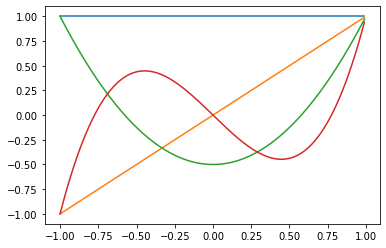

In [9]:
import numpy as np
import matplotlib.pyplot as plt


t = np.arange(-1.0, 1.0, 0.01)

for i in range(4):
    s = P(i)
    plt.plot(t, s(t))

## Zadanie 2

In [3]:
from numpy.polynomial.legendre import leggauss
import scipy.integrate

def integrate_normalized(k, f):
    x, y = leggauss(k)
    x = np.insert(x, 0, -1)
    x = np.append(x, 1)
    s = 0
    for (i, j) in zip(x, x[1:]):
        s += (f(i) + f(j)) / 2 * (j - i)
    return s

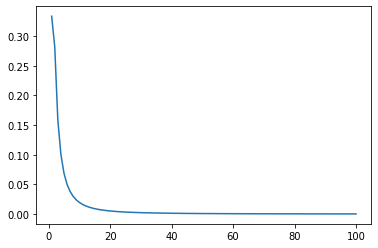

In [4]:
f = lambda x: x**2
accurate = scipy.integrate.quad(f, -1, 1)[0]
x = np.linspace(1, 100, 100)
y = [integrate_normalized(int(i), f) - accurate for i in x]

plt.plot(x, y)

## Zadanie 3

In [5]:
def integrate(k, f, a, b):
    return integrate_normalized(k, lambda x: f((b+a)/2 + (b-a)/2*x) * (b-a)/2)

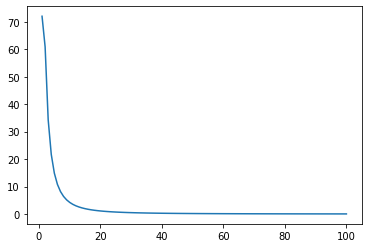

In [6]:
f = lambda x: 3 * (x ** 3) + (x ** 2)
accurate = scipy.integrate.quad(f, -4, 2)[0]
x = np.linspace(1, 100, 100)
y = [abs(integrate(int(i), f, -4, 2) - accurate) for i in x]

plt.plot(x, y)

## Zadanie 5

In [7]:
def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    s = 0
    s += f(a) / 2
    for i in range(1, n):
        s += f(a + i * h)
    s += f(b) / 2
    return s * h

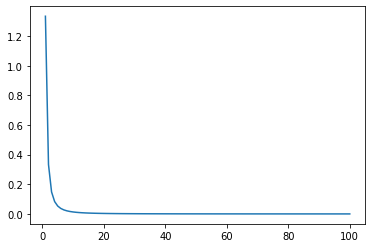

In [8]:
f = lambda x: x**2
accurate = scipy.integrate.quad(f, -1, 1)[0]
x = np.linspace(1, 100, 100)
y = [trapezoidal_rule(f, -1, 1, int(i)) - accurate for i in x]

plt.plot(x, y)